Data set loading

In [9]:
import pickle
import numpy as np
import os

def load_cifar_batch(filename):
    with open(filename, 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
        data = batch[b'data']
        labels = batch[b'labels']
        data = data.reshape((10000, 3, 32, 32)).transpose(0, 2, 3, 1)
        return data, labels

def load_cifar10(root_dir):
    x_train = []
    y_train = []

    # Load training batches
    for i in range(1, 6):
        data_batch, labels_batch = load_cifar_batch(os.path.join(root_dir, f'data_batch_{i}'))
        x_train.append(data_batch)
        y_train.append(labels_batch)

    x_train = np.concatenate(x_train)
    y_train = np.concatenate(y_train)

    # Load test batch
    x_test, y_test = load_cifar_batch(os.path.join(root_dir, 'test_batch'))
    y_test = np.array(y_test)

    return (x_train, y_train), (x_test, y_test)

# Set the path to your extracted CIFAR-10 folder
cifar10_dir = r'C:\Users\PENSION\.keras\datasets\cifar-10-batches-py'
(x_train, y_train), (x_test, y_test) = load_cifar10(cifar10_dir)

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)


Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


Preprocess the Data

In [10]:
from tensorflow.keras.utils import to_categorical


# Normalize image data to 0–1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
# Fix: don't call this again if already applied
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train.shape)  # Should be (50000, 10)
print(y_test.shape)   # Should be (10000, 10)



(50000, 10)
(10000, 10)


Build a Simple CNN

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()  # Shows model architecture


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [ ]:
history = model.fit(
    
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1  # 10% of training data used for validation
)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.2365 - loss: 2.0089 - val_accuracy: 0.4814 - val_loss: 1.4669
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.4178 - loss: 1.5825 - val_accuracy: 0.5400 - val_loss: 1.2961
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.4708 - loss: 1.4537 - val_accuracy: 0.5760 - val_loss: 1.2050
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.5002 - loss: 1.3675 - val_accuracy: 0.5942 - val_loss: 1.1814
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.5246 - loss: 1.3046 - val_accuracy: 0.5812 - val_loss: 1.1759
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.5426 - loss: 1.2705 - val_accuracy: 0.6366 - val_loss: 1.0603
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.5611 - loss: 1.2101 - val_accuracy: 0.6420 - val_loss: 1.0277
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.5713 - loss: 1.1823 - 

Visualize Training History

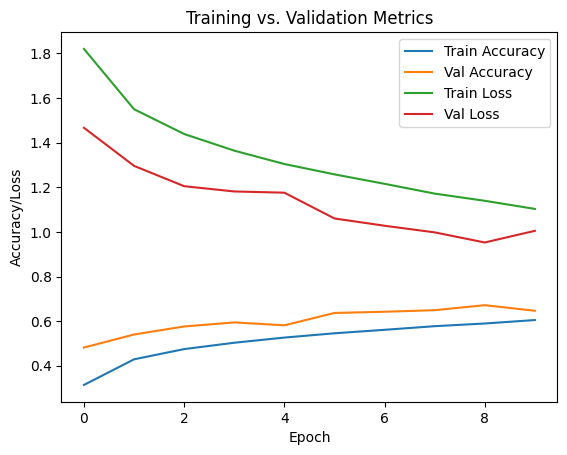

In [13]:
import matplotlib.pyplot as plt

# Assuming `history` is your model's training history object
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.title('Training vs. Validation Metrics')
plt.show()


Evaluate the Model on Test Data

In [14]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6451 - loss: 1.0291
Test accuracy: 0.6405


Save Your Trained Model

In [15]:
model.save("cifar10_model.h5")